<a href="https://colab.research.google.com/github/AgnusTeresa/Sentimental-Analysis-of-Restaurant-Review/blob/main/Sentimental_Analysis_of_Restaurant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t', quoting=3)

In [ ]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
df.shape
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df['length'] = df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
for i in range(0,1000):
  review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string= df['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review = [ps.stem(word)for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

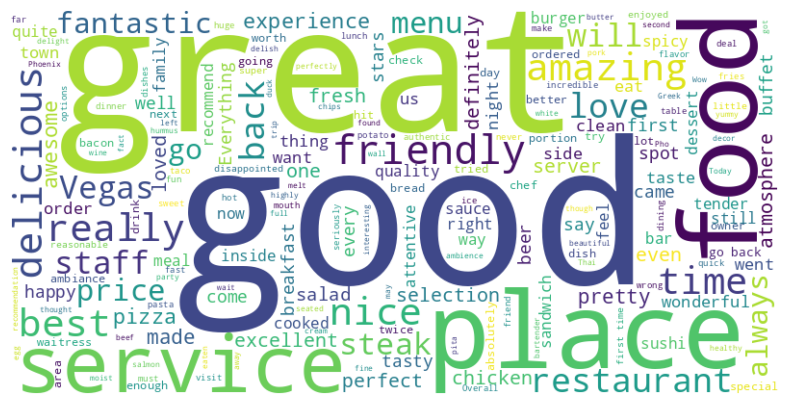

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
# Display the word cloud using Matplotlib
plt.figure(figsize = (10,5))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

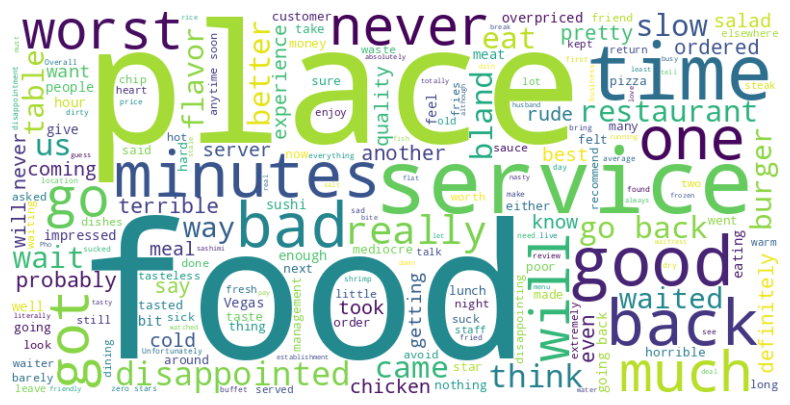

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 0,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
# Display the word cloud using Matplotlib
plt.figure(figsize = (10,5))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF vectors
X = tfidf_vectorizer.fit_transform(df['Review']).toarray()
y = df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

Best Logistic Regression Parameters: {'C': 10, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.81
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        96
           1       0.87      0.75      0.80       104

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



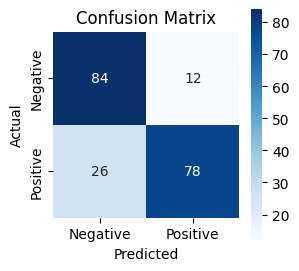

In [ ]:
from sklearn.linear_model import LogisticRegression
# Define a range of hyperparameters for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],  # Solver algorithm
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_logistic_regression = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_logistic_regression.predict(X_test)

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred)

# Print the results
print(f"Best Logistic Regression Parameters: {grid_search.best_params_}")
print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report for Logistic Regression:")
print(classification_report_lr)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', square=True,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best SVM Parameters: {'C': 10, 'kernel': 'rbf'}
SVM Accuracy: 0.825
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        96
           1       0.89      0.76      0.82       104

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



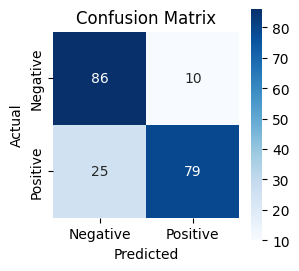

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Define a range of hyperparameters for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_test_pred)
classification_report_svm = classification_report(y_test, y_test_pred)

# Print the results
print(f"Best SVM Parameters: {grid_search.best_params_}")
print(f"SVM Accuracy: {accuracy_svm}")
print("Classification Report for SVM:")
print(classification_report_svm)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', square=True,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best KNN Parameters: {'n_neighbors': 7, 'weights': 'distance'}
KNN Accuracy: 0.745
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        96
           1       0.73      0.80      0.76       104

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



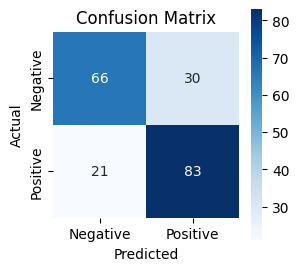

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define a range of hyperparameters for KNN
param_grid = {
    'n_neighbors': [3, 5, 7,10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_knn_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred_1 = best_knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_test_pred_1)
classification_report_knn = classification_report(y_test, y_test_pred_1)

# Print the results
print(f"Best KNN Parameters: {grid_search.best_params_}")
print(f"KNN Accuracy: {accuracy_knn}")
print("Classification Report for KNN:")
print(classification_report_knn)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_1)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', square=True,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
XGBoost Accuracy: 0.735
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.67      0.86      0.76        96
           1       0.83      0.62      0.71       104

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.76      0.73      0.73       200



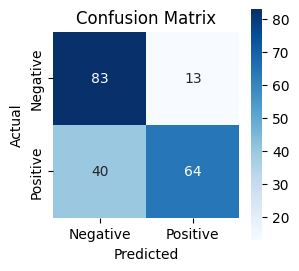

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define a range of hyperparameters for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 4, 5],         # Maximum depth of individual trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_xgb_classifier = grid_search.best_estimator_

# Make predictions on the test data
y_pred_xgb = best_xgb_classifier.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"Best XGBoost Parameters: {grid_search.best_params_}")
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("Classification Report for XGBoost:")
print(classification_report_xgb)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', square=True,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best Multinomial Naive Bayes Parameters: {'alpha': 0.5}
Multinomial Naive Bayes Accuracy: 0.795
Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        96
           1       0.82      0.77      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



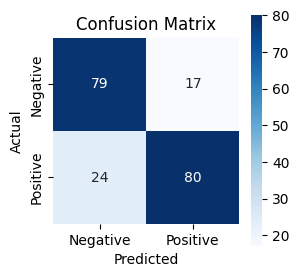

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Define a range of hyperparameters for Multinomial Naive Bayes
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Additive smoothing parameter (Laplace smoothing)
}

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_nb_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred_NB = best_nb_classifier.predict(X_test)

# Evaluate the Multinomial Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_NB)
classification_report_nb = classification_report(y_test, y_pred_NB)

# Print the results
print(f"Best Multinomial Naive Bayes Parameters: {grid_search.best_params_}")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_nb}")
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report_nb)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_NB)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', square=True,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

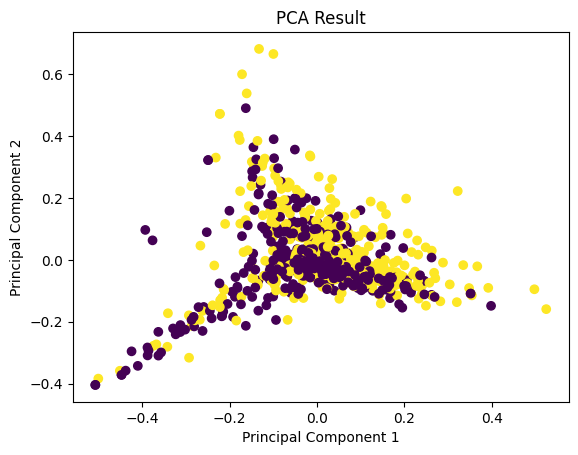

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review'])

# Create a PCA model with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the TF-IDF matrix and transform it
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Plot the results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Liked'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

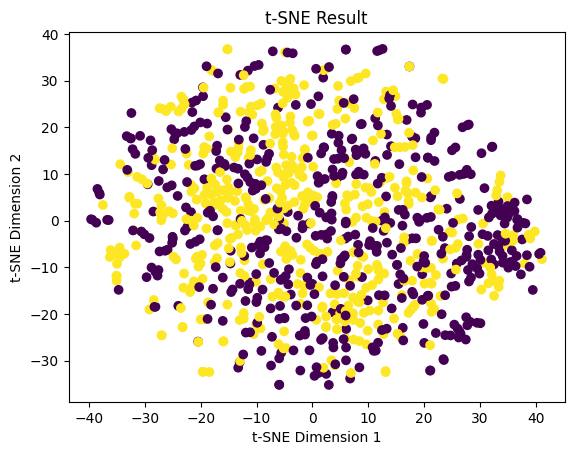

In [ ]:
from sklearn.manifold import TSNE
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Plot the results with color-coding based on the 'Liked' column
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['Liked'], cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Result')
plt.show()

In [ ]:
# Create a t-SNE model with the desired number of components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit t-SNE on the training data and transform the training data
X_train_tsne = tsne.fit_transform(X_train)

# Create a new t-SNE model for transforming the testing data
tsne_test = TSNE(n_components=2, perplexity=30, random_state=42)
X_test_tsne = tsne_test.fit_transform(X_test)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_tsne, y_train)
y_pred_svm = svm_classifier.predict(X_test_tsne)

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tsne, y_train)
y_pred_knn = knn_classifier.predict(X_test_tsne)

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train_tsne, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_tsne)

# Logistic Regression Classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tsne, y_train)
y_pred_lr = logistic_regression.predict(X_test_tsne)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tsne, y_train)
y_pred_rf = rf_classifier.predict(X_test_tsne)

# Evaluate the models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracies
print(f"SVM Accuracy: {accuracy_svm}")
print(f"KNN Accuracy: {accuracy_knn}")
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Random Forest Accuracy: {accuracy_rf}")

SVM Accuracy: 0.47
KNN Accuracy: 0.57
XGBoost Accuracy: 0.53
Logistic Regression Accuracy: 0.445
Random Forest Accuracy: 0.55


7/7 [==============================] - 0s 16ms/step
Deep Learning Model Accuracy: 0.45
Classification Report for Deep Learning Model:
              precision    recall  f1-score   support

           0       0.44      0.54      0.49        96
           1       0.46      0.37      0.41       104

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



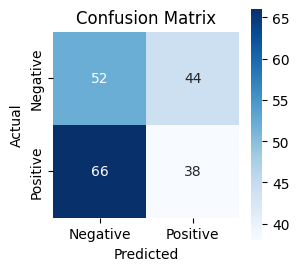

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM-based deep learning model (same as your previous code)

# Compile and train the model (same as your previous code)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
classification_report_dl = classification_report(y_test, y_pred)

# Print the results
print(f"Deep Learning Model Accuracy: {accuracy}")
print("Classification Report for Deep Learning Model:")
print(classification_report_dl)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', square=True,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
